In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [3]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "assign_gpt4_label_based_facts_to_reports" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_nli_label_driven_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl"

Running assign_gpt4_label_based_facts_to_reports()...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
len(report2labels): 54810
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl...
Number of reports with labels: 64235/227835
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
Number of reports with labels: 42783/227835
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl...
Done!


In [7]:
from medvqa.utils.files import load_pickle, load_jsonl
import random

In [5]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl')

In [32]:
tmp[2]

{'enteric tube seen': 1}

In [8]:
tmp2 = load_jsonl("/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl")

In [33]:
tmp2[0]

{'report_idx': 0,
 'background': 'indication: New dyspnea on exertion.',
 'findings': 'Heart size is normal. There are mild aortic knob calcifications. Cardiomediastinal silhouette and hilar contours are otherwise unremarkable. Lungs are clear. Pleural surfaces are clear without effusion or pneumothorax.',
 'impression': 'No acute cardiopulmonary abnormality.',
 'path': '/mnt/data/mimic-cxr/files/p10/p10703179/s58829627.txt',
 'facts': ['normal heart size',
  'mild aortic knob calcifications',
  'unremarkable cardiomediastinal silhouette',
  'unremarkable hilar contours',
  'clear lungs',
  'clear pleural surfaces',
  'pleural surfaces without effusion',
  'pleural surfaces without pneumothorax',
  'no acute cardiopulmonary abnormality'],
 'fact_based_report': 'normal heart size. mild aortic knob calcifications. unremarkable cardiomediastinal silhouette. unremarkable hilar contours. clear lungs. clear pleural surfaces. pleural surfaces without effusion. pleural surfaces without pneumot

In [16]:
idxs = list(range(len(tmp)))

In [23]:
random.shuffle(idxs)
for i in idxs:
    if len(tmp[i]) > 2:
        print(tmp2[i]['fact_based_report'])
        print()
        e = []
        c = []
        n = []
        for k,v in tmp[i].items():
            if v == 0:
                e.append(k)
            elif v == 1:
                n.append(k)
            elif v == 2:
                c.append(k)
            else: assert False
        if e:
            print('Entailment:')
            print(e)
            print()
        if c:
            print('Contradiction:')
            print(c)
            print()
        if n:
            print('Neutral:')
            print(n)
            print()
        break

low lung volumes. stable cardiac contours. stable mediastinal contours. stable hilar contours. stable cardiomegaly. tortuosity of the thoracic aorta. mild relative elevation of the right hemidiaphragm. calcified nodule in the right lower lobe. clear lungs. no pleural effusions. no pneumothorax. surgical clips projecting over each axillary region. no definite change. no evidence of acute cardiopulmonary disease

Entailment:
['calcified nodule seen', 'tortuous aorta seen']

Contradiction:
['mass/nodule (not otherwise specified) seen']

Neutral:
['artifact seen']



In [29]:
f = 'mass/nodule (not otherwise specified) seen'
random.shuffle(idxs)
for i in idxs:
    if f in tmp[i] and tmp[i][f] == 0:
        print(tmp2[i]['fact_based_report'])
        print()
        e = []
        c = []
        n = []
        for k,v in tmp[i].items():
            if v == 0:
                e.append(k)
            elif v == 1:
                n.append(k)
            elif v == 2:
                c.append(k)
            else: assert False
        if e:
            print('Entailment:')
            print(e)
            print()
        if c:
            print('Contradiction:')
            print(c)
            print()
        if n:
            print('Neutral:')
            print(n)
            print()
        break

AP view of the chest. lateral view of the chest. stable cardiomediastinal contours. stable hilar contours. no pleural effusion. no pneumothorax. well expanded lungs. lungs without focal consolidations. nodular opacity at the right lung base not clearly seen. prominent interstitial markings. interstitial markings indicative of chronic lung disease. no displaced rib fractures

Entailment:
['mass/nodule (not otherwise specified) seen']



In [37]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_mlp_nli_softmaxes" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_to_gpt4_label_based_qa_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4 \
--mlp_batch_size 1000 \
--mlp_num_workers 4 \
--mlp_nli_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240407_173847_NLI(Embedding-based)_EmbeddingBasedNLI(128,512-256-128)"

Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
len(unique_sentences): 586430
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl...
len(r2gpt4labels): 227835
ridx_lidx_pairs.shape: (20895521, 2)
Number of skipped pairs: 293134
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                | 0/586430 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=440,3465006188639683439).pkl
len(self.cache["hashes"]) = 4758959
self.cache["embeddings"].shape = (4758959, 128)
100%|███████████████████████████████| 586430/586430 [00:04<00:00, 122170.67it/s]
embeddings.shape: (586430, 128)
metadata loaded from /mnt/data/pamessina/workspac

In [73]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_mlp_nli_softmaxes(hash=2869,32779144096514605).pkl')

In [74]:
tmp.keys()

dict_keys(['ridx_lidx_pairs', 'softmaxes'])

In [75]:
tmp['softmaxes'][0]

array([0.05914372, 0.00259176, 0.9382645 ], dtype=float32)

In [53]:
report_facts = load_jsonl("/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl")

In [55]:
from medvqa.utils.constants import LABEL_BASED_FACTS

In [76]:
q = 0
found = False
idxs = []
for i, (ridx, lidx) in enumerate(tmp['ridx_lidx_pairs']):
    if ridx == q:
        found = True
        idxs.append(i)
    elif found:
        break
        
e = []
n = []
c = []
for i,  p in enumerate(tmp['softmaxes'][idxs].argmax(-1)):
    lidx = tmp['ridx_lidx_pairs'][idxs[i]][1]
    l = LABEL_BASED_FACTS[lidx]
    if p == 0:
        e.append(l)
    elif p == 1:
        n.append(l)
    elif p == 2:
        c.append(l)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')

normal heart size. mild aortic knob calcifications. unremarkable cardiomediastinal silhouette. unremarkable hilar contours. clear lungs. clear pleural surfaces. pleural surfaces without effusion. pleural surfaces without pneumothorax. no acute cardiopulmonary abnormality

Entailment:
	calcification of the aorta seen
	diaphragmatic eventration (benign) seen
	no abnormalities seen
Contradiction:
	airspace opacity seen
	alveolar hemorrhage seen
	alveolar texture seen
	atelectasis seen
	bronchiectasis seen
	cabg grafts seen
	cardiac pacer and wires seen
	cardiomegaly seen
	consolidation seen
	copd/emphysema seen
	costophrenic angle blunting seen
	cyst/bullae seen
	edema seen
	elevated hemidiaphragm seen
	enlarged cardiac silhouette seen
	enlarged cardiomediastinum seen
	enlarged hilum seen
	fibrosis seen
	fluid overload/heart failure seen
	fracture seen
	granulomatous disease seen
	hydropneumothorax seen
	hyperaeration seen
	increased reticular markings/ild pattern seen
	infiltration seen


In [65]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_bart_nli_predictions" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_to_gpt4_label_based_qa_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl" \
--bart_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/seq2seq/20240407_162203_multitask(nli+mlm)_Seq2Seq(facebook-bart-base)" \
--bart_batch_size 100 \
--bart_num_workers 4 \
--part_x_of_y 0 2

Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=545,2400242847100299105).pkl...
len(r2gpt4labels): 227835
100%|████████████████████████████████| 227835/227835 [00:20<00:00, 10945.61it/s]
Processing part 1/2 with 10447760 pairs...
len(input_texts): 10447760
Estimated input_texts memory size: 3797.41 MB
Number of skipped pairs: 950746159
Example sentences to process:
4750551: NLI1: little change compared to previous study. no evidence of acute cardiopulmonary disease. no pneumonia. no vascular congestion. no pleural effusion #H: sub-diaphragmatic air seen
658611: NLI1: frontal view. lateral view. Chest: Frontal. Chest: Lateral. clear lungs. lungs without focal consolidation. no pleural effusion. no pneumothorax. stable cardiac silhouette. stable mediastinal silhouette. no acute cardiopulmonary process #H: emp

In [70]:
tmp2 = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_bart_nli_predictions(1_2)(hash=2588,3246769515408733330).pkl')

In [71]:
tmp2.keys()

dict_keys(['ridx_lidx_pairs', 'predictions'])

In [80]:
q = 113942
found = False
idxs = []
for i, (ridx, lidx) in enumerate(tmp2['ridx_lidx_pairs']):
    if ridx == q:
        found = True
        idxs.append(i)
    elif found:
        break
e = []
n = []
c = []
for idx in idxs:
    p = tmp2['predictions'][idx]
    lidx = tmp2['ridx_lidx_pairs'][idx, 1]
    l = LABEL_BASED_FACTS[lidx]
    if p == 0:
        e.append(l)
    elif p == 1:
        n.append(l)
    elif p == 2:
        c.append(l)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')

bibasilar opacities. multifocal pneumonia. no edema. no pleural effusion. no pneumothorax. normal cardiomediastinal silhouette

Entailment:
	airspace opacity seen
	alveolar texture seen
	consolidation seen
	infiltration seen
	lung lesion seen
	lung opacity seen
	pneumonia seen
Contradiction:
	alveolar hemorrhage seen
	bronchiectasis seen
	cardiomegaly seen
	copd/emphysema seen
	costophrenic angle blunting seen
	cyst/bullae seen
	diaphragmatic eventration (benign) seen
	edema seen
	emphysema seen
	enlarged cardiac silhouette seen
	enlarged cardiomediastinum seen
	fibrosis seen
	fluid overload/heart failure seen
	granulomatous disease seen
	hernia seen
	hydropneumothorax seen
	hyperaeration seen
	interstitial lung disease seen
	lobar/segmental collapse seen
	lung cancer seen
	mass seen
	mass/nodule (not otherwise specified) seen
	mediastinal displacement seen
	mediastinal widening seen
	multiple masses/nodules seen
	no abnormalities seen
	pericardial effusion seen
	pleural abnormalities 

In [82]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "assign_gpt4_label_based_facts_to_reports" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_nli_label_driven_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl"

Running assign_gpt4_label_based_facts_to_reports()...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl...
len(report2labels): 56529
Number of skipped pairs: 88387
Number of not skipped pairs: 69889
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl...
Number of reports with labels: 64925/227835
Loading /home/pame

In [127]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_hybrid_nli_predictions" \
--gpt4_label_based_facts_assigned_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=950,1850545234276111994).pkl" \
--label_based_facts_bart_nli_predictions_filepaths \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_bart_nli_predictions(1_2)(hash=2588,3246769515408733330).pkl" \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_bart_nli_predictions(2_2)(hash=2588,1571788838867977526).pkl" \
--label_based_facts_mlp_nli_softmaxes_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_mlp_nli_softmaxes(hash=2869,32779144096514605).pkl" \
--report_nli_hybrid_metadata_filepath \
"/home/pamessina/medvqa-workspace/cache/report_nli_hybrid_metadata(hash=1011,1136468267405569803).pkl" \
--n_reports 227835

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=950,1850545234276111994).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_mlp_nli_softmaxes(hash=2869,32779144096514605).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_bart_nli_predictions(1_2)(hash=2588,3246769515408733330).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_bart_nli_predictions(2_2)(hash=2588,1571788838867977526).pkl...
Reading /home/pamessina/medvqa-workspace/cache/report_nli_hybrid_metadata(hash=1011,1136468267405569803).pkl...
100%|███████████████████████████| 20895521/20895521 [01:44<00:00, 199750.19it/s]
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_integrated_nli_predictions(hash=739,3322246754106464866).pkl...


In [128]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_integrated_nli_predictions(hash=739,3322246754106464866).pkl')

In [129]:
tmp.keys()

dict_keys(['nli_predictions', 'nli_method_ids', 'nli_method_id_to_name', 'nli_prediction_to_name', 'hybrid_metadata'])

In [135]:
tmp['nli_predictions'][0]

array([2, 2, 2, 3, 1, 2, 2, 3, 1, 3, 2, 0, 3, 3, 3, 2, 3, 3, 1, 2, 2, 2,
       2, 3, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1,
       3, 1, 0, 3, 3], dtype=int8)

In [150]:
report_facts[-13]

{'report_idx': 227822,
 'background': 'indication: Fever, here to evaluate for pneumonia.',
 'findings': 'Upright AP and lateral radiographs of the chest. A left Port-A-Cath is unchanged in position with the tip terminating in the proximal right atrium. The lungs are symmetrically well expanded and well aerated without focal consolidation, concerning for pneumonia, pleural effusion or pneumothorax. The pulmonary vasculature is not engorged. The cardiomediastinal and hilar contours are within normal limits. No acute osseous abnormality is detected.',
 'impression': 'No focal consolidation concerning for pneumonia.',
 'path': '/mnt/data/mimic-cxr/files/p19/p19535031/s59051226.txt',
 'facts': ['left Port-A-Cath unchanged in position',
  'tip of Port-A-Cath terminating in the proximal right atrium',
  'symmetrically well expanded lungs',
  'symmetrically well aerated lungs',
  'lungs without focal consolidation',
  'lungs concerning for pneumonia',
  'lungs concerning for pleural effusion'

In [153]:
q = -300
e = []
n = []
c = []
u = []

for i in range(len(LABEL_BASED_FACTS)):
    p = tmp['nli_predictions'][q, i]
    l = LABEL_BASED_FACTS[i]
    if p == 0:
        e.append(l)
    elif p == 1:
        n.append(l)
    elif p == 2:
        c.append(l)
    elif p == 3:
        u.append(l)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')
if u:
    print('Undecided:')
    for x in u:
        print(f'\t{x}')

PA view of the chest provided. lateral view of the chest provided. Port-A-Cath resides over the right chest wall. catheter tip extending to the mid SVC region unchanged. extensive bilateral calcified pleural plaque. calcified pleural plaque greater on the right. calcified pleural plaque greater on the left. calcified granuloma in the left lower lung. no convincing evidence for pneumonia. limited evaluation of the right lung. mildly enlarged heart. kyphotic positioning limits assessment of the mediastinum. intact bony structures. demineralized bony structures. no definite sign of pneumonia

Entailment:
	calcified nodule seen
	cardiomegaly seen
	chest port seen
	enlarged cardiac silhouette seen
	granulomatous disease seen
	nodule seen
	pleural abnormalities seen
	pleural/parenchymal scarring seen
Contradiction:
	airspace opacity seen
	alveolar hemorrhage seen
	aspiration seen
	bone lesion seen
	cabg grafts seen
	clavicle fracture seen
	fracture seen
	mass seen
	mediastinal widening seen


In [166]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "find_representative_facts" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4 \
--num_kmeans_clusters 200 \
--num_kmeans_iterations 300 \
--num_kmedoids_clusters 5000 \
--num_kmedoids_iterations 300 \
--union_find_threshold 0.97 \
--nearest_k 15

Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
len(facts): 586352
Precomputing tokenized facts and token2count...
100%|████████████████████████████████| 227835/227835 [00:05<00:00, 44158.23it/s]
Computing fact embeddings...
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                | 0/586352 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=440,3465006188639683439).pkl
len(self.cache["hashes"]) = 4758959
self.cache["embeddings"].shape = (4758959, 128)
100%|███████████████████████████████| 586352/586352 [00:04<00:00, 122904.22it/s]
Running kmeans...
Running kmedoids...
  n_clusters: 28, len(idxs): 3206, cluster_fact_embeddings.shape: (3206, 128)
  kmedoids_labels.shape: (3206,), kmedoids_centroids.shape: (28, 128)
Runnin

  kmedoids_labels.shape: (3920,), kmedoids_centroids.shape: (34, 128)
Running kmedoids...
  n_clusters: 21, len(idxs): 2460, cluster_fact_embeddings.shape: (2460, 128)
  kmedoids_labels.shape: (2460,), kmedoids_centroids.shape: (21, 128)
Running kmedoids...
  n_clusters: 31, len(idxs): 3532, cluster_fact_embeddings.shape: (3532, 128)
  kmedoids_labels.shape: (3532,), kmedoids_centroids.shape: (31, 128)
Running kmedoids...
  n_clusters: 27, len(idxs): 3092, cluster_fact_embeddings.shape: (3092, 128)
  kmedoids_labels.shape: (3092,), kmedoids_centroids.shape: (27, 128)
Running kmedoids...
  n_clusters: 20, len(idxs): 2309, cluster_fact_embeddings.shape: (2309, 128)
  kmedoids_labels.shape: (2309,), kmedoids_centroids.shape: (20, 128)
Running kmedoids...
  n_clusters: 18, len(idxs): 2045, cluster_fact_embeddings.shape: (2045, 128)
  kmedoids_labels.shape: (2045,), kmedoids_centroids.shape: (18, 128)
Running kmedoids...
  n_clusters: 18, len(idxs): 2081, cluster_fact_embeddings.shape: (208

  kmedoids_labels.shape: (3941,), kmedoids_centroids.shape: (34, 128)
Running kmedoids...
  n_clusters: 41, len(idxs): 4752, cluster_fact_embeddings.shape: (4752, 128)
  kmedoids_labels.shape: (4752,), kmedoids_centroids.shape: (41, 128)
Running kmedoids...
  n_clusters: 15, len(idxs): 1669, cluster_fact_embeddings.shape: (1669, 128)
  kmedoids_labels.shape: (1669,), kmedoids_centroids.shape: (15, 128)
Running kmedoids...
  n_clusters: 15, len(idxs): 1750, cluster_fact_embeddings.shape: (1750, 128)
  kmedoids_labels.shape: (1750,), kmedoids_centroids.shape: (15, 128)
Running kmedoids...
  n_clusters: 19, len(idxs): 2186, cluster_fact_embeddings.shape: (2186, 128)
  kmedoids_labels.shape: (2186,), kmedoids_centroids.shape: (19, 128)
Running kmedoids...
  n_clusters: 29, len(idxs): 3340, cluster_fact_embeddings.shape: (3340, 128)
  kmedoids_labels.shape: (3340,), kmedoids_centroids.shape: (29, 128)
Running kmedoids...
  n_clusters: 35, len(idxs): 3995, cluster_fact_embeddings.shape: (399

  kmedoids_labels.shape: (3827,), kmedoids_centroids.shape: (33, 128)
Running kmedoids...
  n_clusters: 30, len(idxs): 3513, cluster_fact_embeddings.shape: (3513, 128)
  kmedoids_labels.shape: (3513,), kmedoids_centroids.shape: (30, 128)
Running kmedoids...
  n_clusters: 27, len(idxs): 3111, cluster_fact_embeddings.shape: (3111, 128)
  kmedoids_labels.shape: (3111,), kmedoids_centroids.shape: (27, 128)
Running kmedoids...
  n_clusters: 22, len(idxs): 2539, cluster_fact_embeddings.shape: (2539, 128)
  kmedoids_labels.shape: (2539,), kmedoids_centroids.shape: (22, 128)
Running kmedoids...
  n_clusters: 29, len(idxs): 3359, cluster_fact_embeddings.shape: (3359, 128)
  kmedoids_labels.shape: (3359,), kmedoids_centroids.shape: (29, 128)
Running kmedoids...
  n_clusters: 30, len(idxs): 3489, cluster_fact_embeddings.shape: (3489, 128)
  kmedoids_labels.shape: (3489,), kmedoids_centroids.shape: (30, 128)
Running kmedoids...
  n_clusters: 19, len(idxs): 2201, cluster_fact_embeddings.shape: (220

  kmedoids_labels.shape: (3046,), kmedoids_centroids.shape: (26, 128)
Running kmedoids...
  n_clusters: 31, len(idxs): 3544, cluster_fact_embeddings.shape: (3544, 128)
  kmedoids_labels.shape: (3544,), kmedoids_centroids.shape: (31, 128)
Running kmedoids...
  n_clusters: 10, len(idxs): 1093, cluster_fact_embeddings.shape: (1093, 128)
  kmedoids_labels.shape: (1093,), kmedoids_centroids.shape: (10, 128)
Running kmedoids...
  n_clusters: 25, len(idxs): 2923, cluster_fact_embeddings.shape: (2923, 128)
  kmedoids_labels.shape: (2923,), kmedoids_centroids.shape: (25, 128)
Running kmedoids...
  n_clusters: 26, len(idxs): 2973, cluster_fact_embeddings.shape: (2973, 128)
  kmedoids_labels.shape: (2973,), kmedoids_centroids.shape: (26, 128)
Running kmedoids...
  n_clusters: 21, len(idxs): 2384, cluster_fact_embeddings.shape: (2384, 128)
  kmedoids_labels.shape: (2384,), kmedoids_centroids.shape: (21, 128)
Running kmedoids...
  n_clusters: 54, len(idxs): 6293, cluster_fact_embeddings.shape: (629

In [167]:
!ls -lh "/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl"

-rw-rw-r-- 1 pamessina socvis 315M Apr 21 10:38 '/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl'


In [168]:
tmp = load_pickle("/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl")

In [169]:
tmp.keys()

dict_keys(['facts', 'fact_embeddings', 'representative_fact_idxs', 'dedup_representative_fact_idxs'])

In [170]:
tmp['fact_embeddings'].shape

(586352, 128)

In [171]:
len(tmp['dedup_representative_fact_idxs'])

4311

In [174]:
for idx in tmp['representative_fact_idxs'][:100]:
    print(tmp['facts'][idx])

1-cm nodular opacity in the mid right lung
1-cm opacities in the lower right lung
1.2 cm nodular opacity at the level of the anterior right 6th rib
1.3 cm opacity in the infrahilar region on the right
1.5 cm opacity in the right lower lung
2 chest tubes in the right chest
2 leads in the right ventricle
22 mm oval opacity projecting over the anterior end of the right fourth rib
3 rounded opacifications in the left upper quadrant of the abdomen
4-mm calcified granuloma in the left periphery of the lung
4-mm nodule in the left lower lobe
5-mm nodular opacity in the right upper lung
6-mm nodule in the right lower lung
7-mm nodular opacity in the left upper lobe
8 mm nodular opacity at the level of the posterior rib
9 mm rounded density in the right lower lung zone
AICD in the left chest
AICD in the proper location
AICD with unchanged position of the leads within the region of the right atrium
AICD/pacemaker leads within the region of the coronary sinus
AP chest compared to 10:20 p.m.
AP ch

In [175]:
for idx in tmp['dedup_representative_fact_idxs'][:100]:
    print(tmp['facts'][idx])

1-cm nodular opacity in the mid right lung
1-cm opacities in the lower right lung
1.2 cm nodular opacity at the level of the anterior right 6th rib
1.3 cm opacity in the infrahilar region on the right
2 chest tubes in the right chest
2 leads in the right ventricle
22 mm oval opacity projecting over the anterior end of the right fourth rib
3 rounded opacifications in the left upper quadrant of the abdomen
4-mm calcified granuloma in the left periphery of the lung
4-mm nodule in the left lower lobe
5-mm nodular opacity in the right upper lung
6-mm nodule in the right lower lung
7-mm nodular opacity in the left upper lobe
8 mm nodular opacity at the level of the posterior rib
9 mm rounded density in the right lower lung zone
AICD in the left chest
AICD in the proper location
AICD with unchanged position of the leads within the region of the right atrium
AICD/pacemaker leads within the region of the coronary sinus
AP chest compared to 3:23 a.m.
Biventricular ICD in the left chest wall
CT o

In [3]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "find_k_most_similar_representative_facts_for_each_fact" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--nearest_k 50 \
--batch_size 100 \
--num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
Finding positive and negative representative facts for each fact...
100%|██████████████████████████████████████| 5864/5864 [00:10<00:00, 581.87it/s]
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_k_most_similar_representative_facts(hash=257,81001370560698666).pkl...
Done!


In [3]:
from medvqa.utils.files import load_pickle

In [8]:
repr_facts =  load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl')

In [9]:
repr_facts.keys()

dict_keys(['facts', 'fact_embeddings', 'representative_fact_idxs', 'dedup_representative_fact_idxs'])

In [4]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_k_most_similar_representative_facts(hash=257,81001370560698666).pkl')

In [17]:
i = 500
print(repr_facts['facts'][i])
print()
for x in tmp['most_similar'][i]:
    y = repr_facts['dedup_representative_fact_idxs'][x]
    print(repr_facts['facts'][y])

1.6 cm relatively rounded opacity at the medial left lung base

rounded opacity in the left base
4-mm nodule in the left lower lobe
focal opacity in the posterior left lobe
triangular opacity at the base of the left lung
nodular opacity in the left lower lobe
heterogeneous opacification of the base of the left lung
background opacity in the left lower lung
patchy opacity within the lateral aspect of the left lung base
retrocardiac opacity concerning for pneumonia in the left lower lobe
patchy opacification in the left lower lobe on the left
nodular density of about 7 mm in size
focal opacity in the base of the left lung
dense opacification of the lower zone of left lung
patchy opacity at the base of the left lung
curvilinear opacity at the base of the left lung
opacification of the left lung base likely represents atelectasis
left lower lung focal opacity concerning for pneumonia
infectious opacification in the left lower lobe
new peripheral opacity in the left lower lung
band-like opa

In [62]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "assign_representative_facts_to_reports" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--k_most_similar_representative_facts_per_fact_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_k_most_similar_representative_facts(hash=257,81001370560698666).pkl" \
--n_pos 50 \
--n_rand 50 \
--num_processes 10

Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_k_most_similar_representative_facts(hash=257,81001370560698666).pkl...
Assigning representative facts to reports with num_processes=10...
results.shape: (227835, 100)
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl...
Done!


In [63]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl')

In [64]:
tmp.keys()

dict_keys(['assigned_representative_fact_idxs'])

In [65]:
from medvqa.utils.files import load_jsonl

In [25]:
report_facts = load_jsonl("/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl")

In [30]:
report_facts[-1]

{'report_idx': 227834,
 'background': 'indication: Chest pain.',
 'findings': 'The cardiac silhouette size is top normal. The aorta is mildly unfolded. Hilar contours are normal. The pulmonary vascularity is normal and the lungs are clear. No pleural effusion or pneumothorax is seen. There are mild degenerative changes of the thoracic spine.',
 'impression': 'No acute cardiopulmonary abnormality.',
 'path': '/mnt/data/mimic-cxr/files/p19/p19216802/s51441827.txt',
 'facts': ['cardiac silhouette size is top normal',
  'mildly unfolded aorta',
  'normal hilar contours',
  'normal pulmonary vascularity',
  'clear lungs',
  'no pleural effusion',
  'no pneumothorax',
  'mild degenerative changes of the thoracic spine',
  'no acute cardiopulmonary abnormality'],
 'fact_based_report': 'cardiac silhouette size is top normal. mildly unfolded aorta. normal hilar contours. normal pulmonary vascularity. clear lungs. no pleural effusion. no pneumothorax. mild degenerative changes of the thoracic sp

In [66]:
for i in tmp['assigned_representative_fact_idxs'][-1]:
    print(repr_facts['facts'][repr_facts['dedup_representative_fact_idxs'][i]])

no significant lung abnormalities
no effusion in the lungs
cardiac silhouette top normal in size
cardiac silhouette within normal
moderate tortuosity of the aorta
no evidence of acute cardiopulmonary
no evidence of CHF
no abnormalities of the heart
no abnormality
no suggestion of TRALI/TACO in the pulmonary
stable cardiac silhouette at the upper limits of normal in size
no vascular abnormality in the lungs
no vascular congestion in the mediastinum
no evidence of complications
no evidence of congestion
no evidence of effusion
no evidence of atelectasis
aorta is tortuous in course
sclerosis of the inferior endplates of the thoracic vertebral bodies
no appreciable pleural effusion anteriorly placed
no cardiomegaly in the mediastinum
no evidence of hilar
slightly tortuous appearance of aorta
no evidence of increased effusion
no evidence of lymphadenopathy
lungs with no evidence of focal consolidation
heart upper limit of normal in size
lungs without evidence of pneumonia
top-normal size of

In [47]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "assign_gpt4_representative_facts_to_reports" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl"

Running assign_gpt4_label_based_facts_to_reports()...
len(representative_facts): 4311
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl...
len(report2labels): 1378
Number of skipped pairs: 156891
Number of not skipped pairs: 1385
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl...
Number of reports with labels: 

In [48]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl')

In [59]:
import random
idxs = list(range(len(tmp)))
random.shuffle(idxs)
for i in idxs:
    x = tmp[i]
    if len(x):
        print(x)
        break

{'right lower lung opacity suggesting pneumonia': 0}


In [67]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_mlp_fact_based_nli_softmaxes" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--assigned_representative_facts_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_to_gpt4_qa_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4 \
--mlp_batch_size 1000 \
--mlp_num_workers 4 \
--mlp_nli_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240407_173847_NLI(Embedding-based)_EmbeddingBasedNLI(128,512-256-128)"

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
len(representative_facts): 4311
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl...
assigned_representative_fact_idxs.shape: (227835, 100)
Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
len(unique_sentences): 586352
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl...
len(r2gpt4qa): 227835
ridx_fidx_pairs.shape: (22782723, 2)
Number of skipped pairs: 777
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                | 0/586352 [00:00<?, ?it/s]Loading cached text embedd

In [68]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_mlp_nli_softmaxes(hash=995,3718617080007681420).pkl')

In [69]:
tmp.keys()

dict_keys(['ridx_fidx_pairs', 'softmaxes'])

In [71]:
tmp['softmaxes'][1]

array([9.9911290e-01, 5.5084319e-04, 3.3626702e-04], dtype=float32)

In [72]:
report_facts = load_jsonl("/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl")

In [73]:
repr_facts =  load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl')

In [74]:
repr_facts.keys()

dict_keys(['facts', 'fact_embeddings', 'representative_fact_idxs', 'dedup_representative_fact_idxs'])

In [77]:
q = 10
found = False
idxs = []
for i, (ridx, fidx) in enumerate(tmp['ridx_fidx_pairs']):
    if ridx == q:
        found = True
        idxs.append(i)
    elif found:
        break
        
e = []
n = []
c = []
for i,  p in enumerate(tmp['softmaxes'][idxs].argmax(-1)):
    fidx = tmp['ridx_fidx_pairs'][idxs[i]][1]
    f = repr_facts['facts'][repr_facts['dedup_representative_fact_idxs'][fidx]]
    if p == 0:
        e.append(f)
    elif p == 1:
        n.append(f)
    elif p == 2:
        c.append(f)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')

small bilateral pleural effusions. clear lungs. lungs without focal consolidation. lungs without edema. mild cardiomegaly. atherosclerotic calcifications of the aortic arch. compression deformity in the mid thoracic spine. compression deformity similar to prior

Entailment:
	no significant lung abnormalities
	moderate pleural effusions in the bilateral
	wedge compression fracture in the T12 vertebral body
	moderate size of the pleural effusion
	wedge deformity of the midthoracic vertebrae
	atherosclerotic calcifications of the aorta
	unchanged evidence of mild cardiomegaly
	no effusion in the lungs
	stable compression fracture deformities of the thoracic spine
	slightly increased cardiac silhouette
	unchanged mild enlargement of the cardiac silhouette
	compression deformities in the spine
	compression deformities of the lumbar spine
	small accompanying pleural effusion
	compression fracture of the T12 vertebra is stable
	suggestive of tiny pleural effusions
	severe compression deformit

In [79]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_bart_fact_based_nli_predictions" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--assigned_representative_facts_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--report_to_gpt4_qa_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl" \
--bart_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/seq2seq/20240407_162203_multitask(nli+mlm)_Seq2Seq(facebook-bart-base)" \
--bart_batch_size 100 \
--bart_num_workers 4 \
--part_x_of_y 0 2

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
len(representative_facts): 4311
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl...
assigned_representative_fact_idxs.shape: (227835, 100)
Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl...
len(r2gpt4qa): 227835
Number of skipped pairs: 777
Processing part 1/2 with 11391362 pairs...
len(input_texts): 11391362
Estimated input_texts memory size: 4352.24 MB
Example sentences to process:
4516398: NLI1: PA view of the chest provided. lateral view of the chest provided. overlying EKG lead limits assessment. clear lungs bilaterally. no signs of pneumonia. no sig

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
from medvqa.utils.files import list_filepaths_with_prefix_and_timestamps

In [87]:
list_filepaths_with_prefix_and_timestamps("/mnt/workspace/pamessina/medvqa-workspace/cache/")[:10]

[('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(1_2)(hash=714,782886583103824837).pkl',
  '2024-04-22 07:21:28'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_mlp_nli_softmaxes(hash=995,3718617080007681420).pkl',
  '2024-04-21 22:18:26'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl',
  '2024-04-21 21:42:31'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl',
  '2024-04-21 20:04:59'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_label_based_facts_assigned_to_reports(hash=950,1850545234276111994).pkl',
  '2024-04-21 19:59:53'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_k_most_similar_representative_facts(hash=257,81001370560698666).pkl',
  '2024-04-21 16:13:04'),
 ('/mnt/workspace/pa

In [83]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(1_2)(hash=714,782886583103824837).pkl')

In [84]:
tmp.keys()

dict_keys(['ridx_fidx_pairs', 'predictions'])

In [88]:
q = 113917
found = False
idxs = []
for i, (ridx, lidx) in enumerate(tmp['ridx_fidx_pairs']):
    if ridx == q:
        found = True
        idxs.append(i)
    elif found:
        break
e = []
n = []
c = []
for idx in idxs:
    p = tmp['predictions'][idx]
    fidx = tmp['ridx_fidx_pairs'][idx, 1]
    f = repr_facts['facts'][repr_facts['dedup_representative_fact_idxs'][fidx]]
    if p == 0:
        e.append(f)
    elif p == 1:
        n.append(f)
    elif p == 2:
        c.append(f)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')

comparison with prior chest radiographs. comparison with most recently. severe infiltrative pulmonary abnormality improved. severe pulmonary fibrosis remains. severe pulmonary fibrosis has worsened. small pleural effusions. heart not enlarged. no pneumothorax. ET tube in standard placement. esophageal drainage tube passes into the stomach. esophageal drainage tube out of view. left internal jugular line ends at the thoracic inlet

Entailment:
	endotracheal tube tip terminates at the level of the thoracic inlet
	scarring of the lung parenchyma
	cardiac silhouette within normal
	no enlargement of the heart
	no evidence of acute cardiopulmonary
	component of effusion
	stable position of the endotracheal tube
	ET tube in the appropriate position
	small accompanying pleural effusion
	esophageal catheter terminates in the body of the stomach
	suggestive of tiny pleural effusions
	small amount of bilateral effusions
	no evidence of procedure pneumothorax
	nasogastric drainage tube passing int

In [93]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_hybrid_fact_based_nli_predictions" \
--assigned_representative_facts_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--gpt4_representative_facts_assigned_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl" \
--representative_facts_bart_nli_predictions_filepaths \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(1_2)(hash=714,782886583103824837).pkl" \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(2_2)(hash=714,4113910067759365331).pkl" \
--representative_facts_mlp_nli_softmaxes_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_mlp_nli_softmaxes(hash=995,3718617080007681420).pkl" \
--report_nli_hybrid_metadata_filepath \
"/home/pamessina/medvqa-workspace/cache/report_nli_hybrid_metadata(hash=1011,1136468267405569803).pkl"

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_mlp_nli_softmaxes(hash=995,3718617080007681420).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(1_2)(hash=714,782886583103824837).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(2_2)(hash=714,4113910067759365331).pkl...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl...
assigned_representative_fact_idxs.shape: (227835, 100)
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
Reading /home/pamessina/medvqa-workspace/cache/report_nli_hybrid_metadata(hash=101

In [106]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_fact_based_integrated_nli_predictions(hash=997,3191870595512725333).pkl')

In [107]:
tmp.keys()

dict_keys(['nli_predictions', 'nli_method_ids', 'nli_method_id_to_name', 'nli_prediction_to_name', 'hybrid_metadata'])

In [108]:
tmp['nli_predictions'].shape

(227835, 100)

In [97]:
assigned_repr_facts = load_pickle("/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl")

In [98]:
assigned_repr_facts.keys()

dict_keys(['assigned_representative_fact_idxs'])

In [103]:
q = -10
e = []
n = []
c = []
u = []

for i, idx in enumerate(assigned_repr_facts['assigned_representative_fact_idxs'][q]):
    p = tmp['nli_predictions'][q, i]
    f = repr_facts['facts'][repr_facts['dedup_representative_fact_idxs'][idx]]
    if p == 0:
        e.append(f)
    elif p == 1:
        n.append(f)
    elif p == 2:
        c.append(f)
    elif p == 3:
        u.append(f)
    else: assert False

print(report_facts[q]['fact_based_report'])
print()
if e:
    print('Entailment:')
    for x in e:
        print(f'\t{x}')
if c:
    print('Contradiction:')
    for x in c:
        print(f'\t{x}')
if n:
    print('Neutral:')
    for x in n:
        print(f'\t{x}')
if u:
    print('Undecided:')
    for x in u:
        print(f'\t{x}')

enlarged heart. unremarkable mediastinal contours. aorta is unfolded. aorta is tortuous. well inflated lungs. lungs without evidence of focal airspace consolidation. lungs without evidence of pneumonia. no pleural effusions. no pneumothorax. no evidence of pulmonary edema. mild eventration of the right hemidiaphragm

Entailment:
	unchanged eventration of the right hemidiaphragm
	no substantial accumulation of the pleural effusion
	moderate tortuosity of the aorta
	well-aerated lungs
	no evidence of advanced alveolar edema in the pulmonary vasculature
	widening of the cardiac contour
	aorta is tortuous in course
	no evidence of atelectasis
	no evidence of congestion
	no evidence of effusion
	no vascular congestion in the mediastinum
	no appreciable pleural effusion anteriorly placed
	no cardiomegaly in the mediastinum
	no evidence of increased effusion
	no evidence of interstitial edema
	Eventration of the posterior aspect of the right hemidiaphragm
	heart size above normal
	findings on

In [104]:
list_filepaths_with_prefix_and_timestamps('/mnt/workspace/pamessina/medvqa-workspace/cache/')[:15]

[('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_fact_based_integrated_nli_predictions(hash=997,3191870595512725333).pkl',
  '2024-04-22 09:41:55'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(2_2)(hash=714,4113910067759365331).pkl',
  '2024-04-22 09:16:49'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_bart_nli_predictions(1_2)(hash=714,782886583103824837).pkl',
  '2024-04-22 07:21:28'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_representative_facts_mlp_nli_softmaxes(hash=995,3718617080007681420).pkl',
  '2024-04-21 22:18:26'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl',
  '2024-04-21 21:42:31'),
 ('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_gpt4_representative_facts_assigned_to_reports(hash=953,587644714227321577).pkl',
  '2024-04-21 20:04:59'),
 ('/mnt/work

In [105]:
report_facts[0]

{'report_idx': 0,
 'background': 'indication: New dyspnea on exertion.',
 'findings': 'Heart size is normal. There are mild aortic knob calcifications. Cardiomediastinal silhouette and hilar contours are otherwise unremarkable. Lungs are clear. Pleural surfaces are clear without effusion or pneumothorax.',
 'impression': 'No acute cardiopulmonary abnormality.',
 'path': '/mnt/data/mimic-cxr/files/p10/p10703179/s58829627.txt',
 'facts': ['normal heart size',
  'mild aortic knob calcifications',
  'unremarkable cardiomediastinal silhouette',
  'unremarkable hilar contours',
  'clear lungs',
  'clear pleural surfaces',
  'pleural surfaces without effusion',
  'pleural surfaces without pneumothorax',
  'no acute cardiopulmonary abnormality'],
 'fact_based_report': 'normal heart size. mild aortic knob calcifications. unremarkable cardiomediastinal silhouette. unremarkable hilar contours. clear lungs. clear pleural surfaces. pleural surfaces without effusion. pleural surfaces without pneumot

In [110]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "integrate_and_export_all_data" \
--fact_based_integrated_nli_predictions_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_fact_based_integrated_nli_predictions(hash=997,3191870595512725333).pkl" \
--label_based_integrated_nli_predictions_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_label_based_facts_integrated_nli_predictions(hash=739,3322246754106464866).pkl" \
--assigned_representative_facts_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_assigned_representative_facts_to_reports(hash=474,1880255534079539538).pkl" \
--deduplicated_representative_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--integrated_sentence_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_sentence_facts(59349684,50956825).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_deduplicated_representative_facts(hash=460,360882518922904019).pkl...
Computing label-based fact embeddings...
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9337.pt']
  0%|                                                    | 0/93 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=440,3465006188639683439).pkl
len(self.cache["hashes"]) = 4758959
self.cache["embeddings"].shape = (4758959, 128)
100%|███████████████████████████████████████████| 93/93 [00:03<00:00, 26.08it/s]
label_based_fact_embeddings.shape: (93, 128)
100%|█████████████████████████████████| 227835/227835 [00:47<00:00, 4755.58it/s]
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_fact_based_integrated_nli_predictions(hash=997,3191870595512725333).pkl...
Reading /mnt/workspace/pam

In [111]:
!ls -lh "/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl"

-rw-rw-r-- 1 pamessina socvis 970M Apr 23 01:33 '/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl'


In [112]:
tmp = load_pickle("/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl")

In [113]:
tmp.keys()

dict_keys(['extracted_facts', 'extracted_fact_embeddings', 'representative_fact_idxs', 'label_based_facts', 'label_based_fact_embeddings', 'reports', 'fact_based_nli_predictions', 'label_based_nli_predictions', 'gpt4_report_nli_input_output'])

In [115]:
len(tmp['extracted_facts']), tmp['extracted_fact_embeddings'].shape

(586352, (586352, 128))

In [132]:
tmp['extracted_fact_embeddings'].dtype

dtype('float32')

In [133]:
len(tmp['representative_fact_idxs']), type(tmp['representative_fact_idxs'])

(4311, list)

In [118]:
tmp['label_based_fact_embeddings'].shape

(93, 128)

In [121]:
tmp['reports'][13]

{'report_idx': 13,
 'background': 'indication: Cough. Evaluate for pneumonia.',
 'findings': 'Frontal lateral chest radiographs demonstrate a normal cardiomediastinal silhouette. Increased opacity in the right lower lung, with corresponding increased opacity over projecting over the spine on lateral view is suggestive of the right lower lobe consolidation. No pneumothorax is seen. There is a small right pleural effusion. Previously noted bullae are unchanged.',
 'impression': '1. Findings suggestive of a right lower lobe consolidation, consistent with pneumonia. 2. Previously noted bullae are unchanged.',
 'path': '/mnt/data/mimic-cxr/files/p10/p10579352/s56964945.txt',
 'facts': ['normal cardiomediastinal silhouette',
  'increased opacity in the right lower lung',
  'increased opacity over projecting over the spine on lateral view',
  'right lower lobe consolidation',
  'no pneumothorax',
  'small right pleural effusion',
  'unchanged bullae',
  'consolidation consistent with pneumoni

In [123]:
tmp['fact_based_nli_predictions'].keys()

dict_keys(['nli_predictions', 'nli_method_ids', 'nli_method_id_to_name', 'nli_prediction_to_name', 'hybrid_metadata', 'representative_fact_idxs_per_report'])

In [136]:
tmp['fact_based_nli_predictions']['representative_fact_idxs_per_report'].shape

(227835, 100)

In [138]:
tmp['fact_based_nli_predictions']['nli_predictions'].dtype

dtype('int8')

In [139]:
tmp['fact_based_nli_predictions']['nli_method_ids'].dtype

dtype('int8')

In [141]:
tmp['fact_based_nli_predictions']['nli_method_id_to_name']

{0: 'hybrid', 1: 'gpt4'}

In [142]:
tmp['fact_based_nli_predictions']['nli_prediction_to_name']

{0: 'entailment', 1: 'neutral', 2: 'contradiction', 3: 'undecided'}

In [143]:
tmp['fact_based_nli_predictions']['hybrid_metadata']

{'hybrid_threshold_1': 0.1,
 'hybrid_threshold_2': 0.3,
 'airspace opacity seen': {'mlp_et': 0.06611190736293793,
  'mlp_ct': 0.938150942325592,
  'mlp_f1': 0.96,
  's2s_f1': 0.9504950495049505},
 'alveolar hemorrhage seen': {'mlp_et': 0.08815649896860123,
  'mlp_ct': 0.6947060823440552,
  'mlp_f1': 0.84375,
  's2s_f1': 0.8771929824561403},
 'alveolar texture seen': {'mlp_et': 0.07071922719478607,
  'mlp_ct': 0.8218728303909302,
  'mlp_f1': 0.56,
  's2s_f1': 0.0},
 'aortic graft/repair seen': {'mlp_et': 0.02535993419587612,
  'mlp_ct': 0.4908551871776581,
  'mlp_f1': 0.963855421686747,
  's2s_f1': 0.9879518072289156},
 'artifact seen': {'mlp_et': 0.21445369720458984,
  'mlp_ct': 0.6339350938796997,
  'mlp_f1': 0.95,
  's2s_f1': 0.9629629629629629},
 'aspiration seen': {'mlp_et': 0.06731690466403961,
  'mlp_ct': 0.06650009751319885,
  'mlp_f1': 0.9230769230769231,
  's2s_f1': 0.9397590361445783},
 'atelectasis seen': {'mlp_et': 0.1074586883187294,
  'mlp_ct': 0.3974692225456238,
  'mlp_

In [126]:
tmp['label_based_nli_predictions'].keys()

dict_keys(['nli_predictions', 'nli_method_ids', 'nli_method_id_to_name', 'nli_prediction_to_name', 'hybrid_metadata'])

In [144]:
tmp['label_based_nli_predictions']['nli_predictions'].shape

(227835, 93)

In [128]:
tmp['label_based_nli_predictions']['nli_predictions'][1]

array([3, 2, 0, 1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 3, 3,
       3, 1, 2, 2, 3, 1, 2, 2, 2, 1, 3, 2, 3, 1, 2, 3, 2, 3, 3, 2, 2, 2,
       1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 2,
       2, 2, 2, 3, 1, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 1,
       1, 1, 3, 2, 2], dtype=int8)

In [146]:
len(tmp['gpt4_report_nli_input_output'])

158276

In [145]:
for x in tmp['gpt4_report_nli_input_output']:
    if 'reason' not in x:
        print(x)
        break

{'premise': "mild cardiomegaly. tortuous aorta. low lung volumes. ill-defined opacity in the left upper lung. opacity worrisome for aspiration. opacity worrisome for pneumonia. superimposed to patient's known emphysema. superimposed to patient's subpleural interstitial abnormality. no pneumothorax. no pleural effusion", 'hypothesis': 'tortuous aorta seen', 'label': 'definitely true'}


In [151]:
# --gpt4_report_nli_input_output_jsonl_filepaths \
# --integrated_report_facts_jsonl_filepaths
    
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts" \
--pos_neg_facts_mode "label_based" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl"

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl...
Getting positive and negative facts per report with num_processes=10...
100%|████████████████████████████████| 227835/227835 [00:02<00:00, 95488.39it/s]
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_label_based_pos_neg_facts(hash=207,1199289774163830850).pkl...
Done!


In [152]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_label_based_pos_neg_facts(hash=207,1199289774163830850).pkl')

In [153]:
tmp.keys()

dict_keys(['facts', 'embeddings', 'dicom_id_to_pos_neg_facts', 'ridxs_with_conflict'])

In [164]:
len(tmp['ridxs_with_conflict'])

0

In [156]:
dicom_ids = list(tmp['dicom_id_to_pos_neg_facts'].keys())

In [163]:
# tmp['dicom_id_to_pos_neg_facts'][dicom_ids[5]]

In [193]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts" \
--pos_neg_facts_mode "fact_based" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl...
len(report2labels): 86238
Number of skipped pairs: 0
Number of not skipped pairs: 158276
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl...


In [194]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_fact_based_pos_neg_facts(hash=1020,430315367879679981).pkl')

In [195]:
tmp.keys()

dict_keys(['facts', 'embeddings', 'dicom_id_to_pos_neg_facts', 'ridxs_with_conflict'])

In [196]:
len(tmp['ridxs_with_conflict'])

0

In [197]:
p = tmp['dicom_id_to_pos_neg_facts'][dicom_ids[1010]]
for x in p[0]:
    print(tmp['facts'][x])
print()
for x in p[1]:
    print(tmp['facts'][x])

no focal consolidation of the right lung
no bony abnormalities
no evidence of pathologic parenchymal changes
normal unchanged appearance of the cardiac silhouette
no acute abnormality in the osseous structures
no pleural effusion
no substantial accumulation of the pleural effusion
no pneumothorax
no evidence of lymphadenopathy
no focal consolidation
no evidence of complications
no acute fracture
no remaining pneumothorax on the right base
no focal
no vascular congestion in the mediastinum
normal appearance of the mediastinum
no evidence of hilar
no evidence of acute cardiopulmonary
no evidence of increased effusion
cardiac silhouette within normal
no evidence of focal consolidation
no suspicious sclerotic lesion in the osseous structures
no evidence of congestion
no abnormality
normal heart size
no evidence of focal consolidation suspicious for pneumonia
no minimal pleural effusion
mediastinal contours within normal limits
no significant lung abnormalities
no acute displaced fractures


In [198]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts" \
--pos_neg_facts_mode "all" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl...
Getting positive and negative facts per report with num_processes=10...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl...
len(report2labels): 86238
Number of skipped pairs: 0
Number of not skipped pairs: 158276
Loading /home/pamessina/medvqa-workspace/ca

In [2]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts__replace_embeddings" \
--dicom_id_to_pos_neg_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240629_084405_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl...
Computing new embeddings...
checkpoint_names = ['checkpoint_196_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9189.pt']
  0%|                                                | 0/596394 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=441,505879158912416539).pkl
len(self.cache["hashes"]) = 1850
self.cache["embeddings"].shape = (1850, 128)
100%|███████████████████████████████| 596394/596394 [00:00<00:00, 601594.82it/s]
Computing embeddings for 595259 new texts
checkpoint_names = ['checkpoint_196_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9189.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240629_084405_MIMIC-CXR(

In [199]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl')

In [200]:
tmp.keys()

dict_keys(['facts', 'embeddings', 'dicom_id_to_pos_neg_facts', 'ridxs_with_conflict'])

In [201]:
len(tmp['ridxs_with_conflict'])

0

In [202]:
p = tmp['dicom_id_to_pos_neg_facts'][dicom_ids[1010]]
for x in p[0]:
    print(tmp['facts'][x])
print()
for x in p[1]:
    print(tmp['facts'][x])

cardiac silhouette within normal
no evidence of focal consolidation
no suspicious sclerotic lesion in the osseous structures
no evidence of congestion
no abnormality
normal heart size
no evidence of focal consolidation suspicious for pneumonia
no minimal pleural effusion
no significant lung abnormalities
mediastinal contours within normal limits
no acute displaced fractures
no convincing evidence of the presence of rib fractures
no evidence of procedure pneumothorax
no appreciable pleural effusion anteriorly placed
hilar contours within normal limits
no clear explanation in the chest
no effusion in the lungs
no abnormalities in the chest
no evidence of effusion
no focal opacity in the lungs
no evidence of atelectasis
no abnormality in the retrosternal space
no abnormalities seen
no effusion on the lateral view
no additional sites of consolidation
normal appearance of the cardiomediastinal silhouette
no pleural pneumothorax
no evidence of new fractures
no evidence of acute infection
no 

In [399]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "compute_clusters_and_cluster_weights_for_facts" \
--num_kmeans_clusters 200 \
--dicom_id_to_pos_neg_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl"

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl...
Computing 200 clusters...
100%|█████████████████████████████████| 377110/377110 [03:33<00:00, 1765.00it/s]
Saving /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_clusters_and_cluster_weights_for_facts(hash=226,607533638975659953).pkl...
Done!


In [400]:
tmp = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_clusters_and_cluster_weights_for_facts(hash=226,607533638975659953).pkl')

In [401]:
tmp2 = load_pickle(tmp['dicom_id_to_pos_neg_facts_filepath'])

In [402]:
tmp.keys()

dict_keys(['dicom_id_to_pos_neg_facts_filepath', 'cluster_assignments', 'cluster_centers', 'cluster_counts', 'cluster_weights', 'label_counts', 'label_weights'])

In [403]:
tmp2.keys()

dict_keys(['facts', 'embeddings', 'dicom_id_to_pos_neg_facts', 'ridxs_with_conflict'])

In [404]:
c2idxs = [[] for _ in range(len(tmp['cluster_centers']))]
for i, c in enumerate(tmp['cluster_assignments']):
    c2idxs[c].append(i)

In [405]:
# i = 20
i = tmp2['facts'].index('skin fold seen')
tmp2['facts'][i], tmp['cluster_assignments'][i]

('skin fold seen', 181)

In [406]:
tmp['cluster_weights'][181]

array([6.5257626e-07, 2.0986359e-05], dtype=float32)

In [407]:
tmp['cluster_counts'][181]

array([1532387,   47649], dtype=int32)

In [414]:
tmp['label_counts'][i], tmp['label_weights'][i]

(array([ 635, 5998], dtype=int32),
 array([0.00157233, 0.00016669], dtype=float32))

In [412]:
sorted(tmp['label_counts'].tolist())

[[635, 5998],
 [1143, 244077],
 [1324, 242896],
 [1604, 253208],
 [1770, 201779],
 [1789, 342416],
 [1930, 271362],
 [2254, 292956],
 [2319, 138922],
 [2322, 264663],
 [2564, 287272],
 [2823, 140578],
 [2940, 187612],
 [2965, 264305],
 [3105, 229530],
 [3253, 138175],
 [3253, 171004],
 [3514, 119754],
 [3726, 259107],
 [3777, 153517],
 [5390, 274893],
 [5462, 189284],
 [5650, 211241],
 [5726, 300227],
 [6084, 7200],
 [6215, 318148],
 [6441, 370669],
 [6464, 235284],
 [6814, 272109],
 [6837, 198225],
 [7310, 172186],
 [7690, 93109],
 [8285, 111919],
 [8538, 265658],
 [9131, 267782],
 [9291, 237657],
 [9487, 253697],
 [9488, 5795],
 [10103, 260010],
 [11119, 242535],
 [11469, 212837],
 [13325, 218815],
 [13637, 233472],
 [13923, 263285],
 [14665, 181240],
 [15349, 191559],
 [15428, 338261],
 [15685, 185046],
 [16151, 150989],
 [16362, 7780],
 [16688, 13538],
 [16782, 303134],
 [16970, 224228],
 [17540, 189222],
 [17642, 13553],
 [18355, 130957],
 [18407, 202681],
 [20445, 196382],
 [2112

In [386]:
import random

for x in random.sample(c2idxs[181], 20):
    print(tmp2['facts'][x])

no appreciable pleural effusion on this supine film
no substantial re-accumulation of pleural fluid
no appreciable reaccumulation of pleural fluid
normal other pleural surfaces
no clear pleural effusion seen on the lateral view
pleural surfaces without pleural effusion
skin folds on the right are visualized
no evidence of pleural effusions in the lateral pleural sinuses
no free pleural fluid
lateral pleural sinus is free
no signs for large pleural effusions
no convincing evidence of large effusion
no gross effusions detected
no pleural
no definite pleural effusion seen
no convincing evidence of pleural effusion
no new edematous changes
no new concerning pleural findings
hiatal hernia not visualized
posterior pleural sinus has disappeared


In [293]:
tmp['cluster_centers'].shape

(200, 128)

In [298]:
tmp['cluster_weights'] / tmp['cluster_weights'].sum()

array([[4.90660081e-03, 3.14038363e-04],
       [9.96936928e-04, 2.74792023e-04],
       [4.53180655e-05, 2.08329555e-04],
       [7.07678823e-03, 2.82440986e-03],
       [1.40673900e-02, 1.57666299e-02],
       [7.78282760e-04, 2.53991014e-03],
       [1.06192369e-03, 1.32741302e-03],
       [1.22756092e-03, 1.17752107e-03],
       [3.47181340e-03, 2.30382336e-03],
       [1.46873249e-03, 2.75686878e-04],
       [2.57835467e-03, 8.76789098e-04],
       [1.39256695e-03, 8.74406949e-04],
       [1.39376393e-03, 8.55822698e-04],
       [1.17548555e-03, 2.58223969e-04],
       [5.35225321e-04, 1.72659382e-03],
       [2.27700942e-03, 9.14810691e-04],
       [7.19453348e-03, 3.96762369e-03],
       [6.86577288e-04, 2.71605514e-03],
       [1.36958598e-03, 1.40453631e-03],
       [5.17681334e-03, 1.72348809e-03],
       [2.92768411e-04, 2.31500613e-04],
       [4.33521485e-03, 1.53941521e-03],
       [2.99484748e-03, 2.82725086e-03],
       [5.76448045e-04, 1.78553141e-03],
       [1.072636

In [333]:
tmp = load_pickle("/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl")

In [336]:
tmp.keys()

dict_keys(['extracted_facts', 'extracted_fact_embeddings', 'representative_fact_idxs', 'label_based_facts', 'label_based_fact_embeddings', 'reports', 'fact_based_nli_predictions', 'label_based_nli_predictions', 'gpt4_report_nli_input_output'])

In [337]:
tmp['label_based_nli_predictions'].keys()

dict_keys(['nli_predictions', 'nli_method_ids', 'nli_method_id_to_name', 'nli_prediction_to_name', 'hybrid_metadata'])

In [338]:
tmp['label_based_nli_predictions']['nli_predictions']

array([[2, 2, 2, ..., 0, 3, 3],
       [3, 2, 0, ..., 3, 2, 2],
       [0, 2, 0, ..., 3, 2, 2],
       ...,
       [3, 2, 0, ..., 3, 3, 2],
       [3, 2, 2, ..., 3, 2, 2],
       [3, 2, 2, ..., 2, 2, 3]], dtype=int8)

In [339]:
tmp['label_based_nli_predictions']['nli_predictions'].shape

(227835, 93)

In [209]:
labels = tmp['label_based_nli_predictions']['nli_predictions']
counts = (labels == 0).sum(0)

In [238]:
empty_count = ((labels == 0).sum(1) == 0).sum()

In [239]:
empty_count

4994

In [227]:
sorted(counts)

[463,
 682,
 881,
 923,
 925,
 1314,
 1394,
 1470,
 1476,
 1523,
 1547,
 1662,
 1713,
 1813,
 1976,
 2272,
 2372,
 2575,
 2662,
 2916,
 3095,
 3102,
 3149,
 3397,
 3486,
 3531,
 3563,
 3785,
 3827,
 4780,
 4869,
 4908,
 5062,
 5358,
 5426,
 5559,
 5668,
 5742,
 7078,
 7124,
 7234,
 7335,
 7440,
 8136,
 8295,
 8995,
 9026,
 9528,
 9703,
 9714,
 10026,
 10057,
 10462,
 10758,
 10956,
 10997,
 11598,
 11605,
 13081,
 13674,
 14004,
 14433,
 14851,
 15100,
 15194,
 17712,
 17764,
 21906,
 26844,
 29856,
 37218,
 43294,
 44052,
 44287,
 46059,
 47579,
 51349,
 52314,
 56809,
 57037,
 57547,
 64204,
 68367,
 69975,
 72339,
 82142,
 85295,
 89299,
 90090,
 93497,
 93813,
 119873,
 124434]

In [214]:
class_names = tmp['label_based_facts']

In [232]:
from medvqa.evaluation.plots import plot_barchart

In [215]:
from importlib import reload
import medvqa

In [231]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

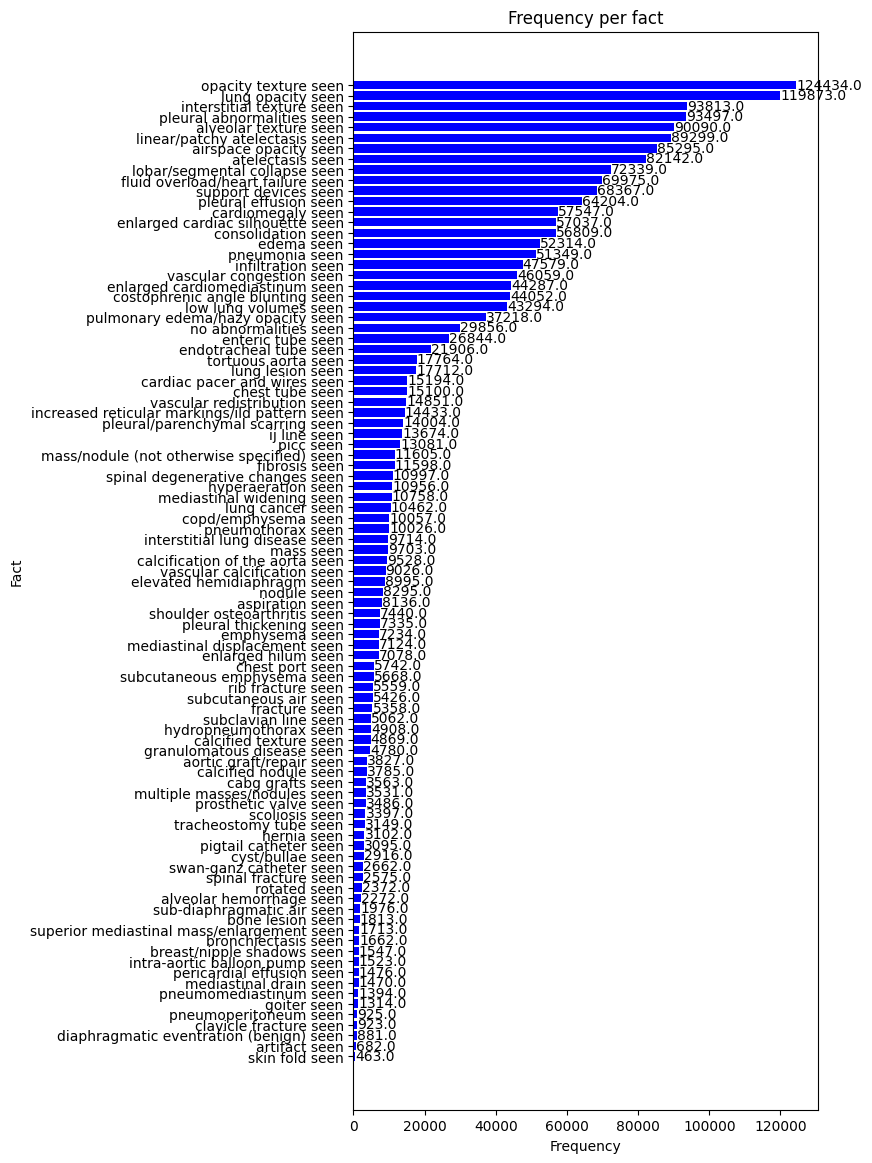

In [234]:
plot_barchart(
    data=counts,
    title='Frequency per fact',
    xlabel='Frequency',
    ylabel='Fact',
    horizontal=True,
    bar_names=class_names,
    sort_data=True,
    write_values_on_bars=True,
    figsize=(6, 14)
)

In [369]:
is_long_tail = counts < 0.02 * len(labels)
is_middle_tail = (counts >= 0.02 * len(labels)) & (counts < 0.05 * len(labels))
is_short_tail = counts >= 0.05 * len(labels)

In [370]:
is_long_tail.sum(), is_middle_tail.sum(), is_short_tail.sum()

(29, 27, 37)

In [371]:
(~ is_long_tail).sum()

64

In [372]:
binary_labels = labels == 0

In [373]:
lt_count = 0
mt_count = 0
st_count = 0
for i in range(len(labels)):
    if is_long_tail[binary_labels[i]].any():
        lt_count += 1
    elif is_middle_tail[binary_labels[i]].any():
        mt_count += 1
    else:
        st_count += 1

In [374]:
lt_count, mt_count, st_count

(49794, 63997, 114044)

In [415]:
tuples = []
for i, cn in enumerate(class_names):
    if is_short_tail[i]:
        tuples.append((counts[i], cn))
tuples.sort(reverse=True)
for x in tuples:
    print(x)

(124434, 'opacity texture seen')
(119873, 'lung opacity seen')
(93813, 'interstitial texture seen')
(93497, 'pleural abnormalities seen')
(90090, 'alveolar texture seen')
(89299, 'linear/patchy atelectasis seen')
(85295, 'airspace opacity seen')
(82142, 'atelectasis seen')
(72339, 'lobar/segmental collapse seen')
(69975, 'fluid overload/heart failure seen')
(68367, 'support devices seen')
(64204, 'pleural effusion seen')
(57547, 'cardiomegaly seen')
(57037, 'enlarged cardiac silhouette seen')
(56809, 'consolidation seen')
(52314, 'edema seen')
(51349, 'pneumonia seen')
(47579, 'infiltration seen')
(46059, 'vascular congestion seen')
(44287, 'enlarged cardiomediastinum seen')
(44052, 'costophrenic angle blunting seen')
(43294, 'low lung volumes seen')
(37218, 'pulmonary edema/hazy opacity seen')
(29856, 'no abnormalities seen')
(26844, 'enteric tube seen')
(21906, 'endotracheal tube seen')
(17764, 'tortuous aorta seen')
(17712, 'lung lesion seen')
(15194, 'cardiac pacer and wires seen')

In [6]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "sample_negative_facts_per_report_with_fact_embeddings_and_mlp_nli" \
--integrated_report_facts_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240629_084405_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4 \
--mlp_batch_size 1000 \
--mlp_num_workers 4 \
--mlp_nli_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240731_002153_NLI(Embedding-based)_EmbeddingBasedNLI(128,512-256-128)" \
--mlp_nli_entailment_threshold 0.1723824292421341 \
--num_kmeans_clusters 100 \
--max_negative_facts_per_report 500

Reading /home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl...
n_reports: 227835
len(unique_sentences): 586352
checkpoint_names = ['checkpoint_196_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+spss+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9189.pt']
  0%|                                                | 0/586352 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=441,505879158912416539).pkl
len(self.cache["hashes"]) = 3351526
self.cache["embeddings"].shape = (3351526, 128)
100%|███████████████████████████████| 586352/586352 [00:03<00:00, 155443.75it/s]
embeddings.shape: (586352, 128)
Clustering embeddings...
Loading cached kmeans labels from /mnt/workspace/pamessina/medvqa-workspace/cache/kmeans_labels(27449678,718365540343524531).pkl
Assigning candidate negative facts to reports...
100%|█████████████████████████████████| 227835/227835 [02:20<00:00, 1626.77it/s]
Compu

In [66]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts__improved_mlp_nli_based_negative_sampling" \
--pos_neg_facts_mode "all" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_cxrlt2024_report_nli_queries_dev.jsonl" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--mimiccxr_negative_facts_assigned_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_negative_facts_assigned_to_reports(hash=708,831546115257297989).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240629_084405_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl...
Getting positive and negative facts per report with num_processes=10...
Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_negative_facts_assigned_to_reports(hash=708,831546115257297989).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl

In [118]:
!python ../../scripts/mimiccxr/find_pos_neg_neutral_facts_per_report_v2.py \
--task "export_dicom_id_to_positive_negative_facts__improved_mlp_nli_based_negative_sampling" \
--pos_neg_facts_mode "fact_based" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--gpt4_report_nli_input_output_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl" \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_cxrlt2024_report_nli_queries_dev.jsonl" \
--integrated_report_facts_jsonl_filepaths \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts_metadata(227835,78646269).jsonl" \
"/home/pamessina/medvqa-workspace/cache/mimiccxr/integrated_report_facts(79040140).jsonl" \
--mimiccxr_negative_facts_assigned_to_reports_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_negative_facts_assigned_to_reports(hash=708,831546115257297989).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240629_084405_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 4

Reading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_negative_facts_assigned_to_reports(hash=708,831546115257297989).pkl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v2).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_labels,v3).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts).jsonl...
Loading /home/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_fact_based_report_nli_queries(from_facts,v2).jsonl...
Loading /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/openai/gpt-4-1106-preview_cxrlt2024_report_nli_queries_dev.jsonl...
len(report2labels): 188717
Number of skipped pairs: 0
